In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def midpoint_method(x_0, N, T, f, params):

    Del = T / N
    A = [x_0]
    
    t = 0

    for i in range(N):
        
        k_t = x_0 + Del / 2 * f(t, x_0, params)
        x_0 += Del * f(t + Del / 2, k_t, params)
        A.append(x_0)
        
        t += Del

    return A

In [3]:
def mathieu_equation(t, x, params):
    
    a,b = params[0],params[1]
    
    A_t = np.array([np.array([0, -(a + b * np.cos(t))]),
                    np.array([1, 0])])
    
    return np.array(A_t @ x)
    

In [4]:
def calc_monodromy(a,b):

    x_0 = np.identity(2)
    T = 2 * np.pi
    N = 100
    params = [a,b]
    
    A = midpoint_method(x_0, N, T, mathieu_equation, params)
    
    x_T = A[-1]
    
    return(x_T)
    

In [5]:
print(calc_monodromy(0.1,0.1))

[[-0.48008265 -0.20090595]
 [ 3.83026884 -0.48008826]]


In [6]:
A = {}

for a in range(161):
    for b in range(-40,41):
        
        M = calc_monodromy(a / 20,b / 20)
        A["a:"+str(a)+"b:"+str(b)] = M
        
        eigvalues = np.linalg.eig(M)[0]
        A["min:a:"+str(a)+"b:"+str(b)] = min(eigvalues)
        A["max:a:"+str(a)+"b:"+str(b)] = max(eigvalues)
        
        

In [7]:
A_graphing = []

for a in range(161):
    row = []
    for b in range(-40,41):
        if np.real(A["max:a:"+str(a)+"b:"+str(b)]) > 1: row.append(1)
        elif np.real(A["min:a:"+str(a)+"b:"+str(b)]) < -1: row.append(1)
        else: row.append(0)
            
    A_graphing.append(row)
    

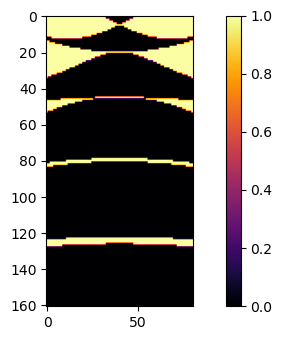

In [8]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
data2D = A_graphing
im = plt.imshow(data2D, cmap="inferno")
plt.colorbar(im)
plt.show()

In [9]:
A_graphing = []

for a in range(161):
    row = []
    for b in range(-40,41):
        row.append(np.linalg.det(A["a:"+str(a)+"b:"+str(b)]))
            
    A_graphing.append(row)
    

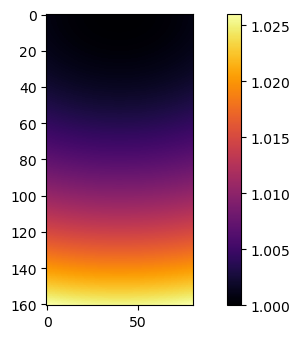

In [10]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
data2D = A_graphing
im = plt.imshow(data2D, cmap="inferno")
plt.colorbar(im)
plt.show()

In [11]:
A_graphing = []

for a in range(161):
    row = []
    for b in range(-40,41):
        row.append(np.linalg.det(A["a:"+str(a)+"b:"+str(b)]))
            
    A_graphing.append(row)
    

In [12]:
b = 2

real_max = []
im_max = []

real_min = []
im_min = []

for a in range(161):
    
    real_max.append(np.real(A["max:a:"+str(a)+"b:"+str(b)]))
    im_max.append(np.imag(A["max:a:"+str(a)+"b:"+str(b)]))
    
    real_min.append(np.real(A["min:a:"+str(a)+"b:"+str(b)]))
    im_min.append(np.imag(A["min:a:"+str(a)+"b:"+str(b)]))

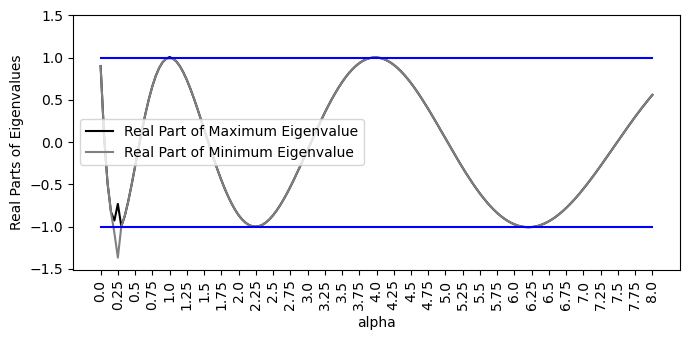

In [13]:
plt.plot(np.array(real_max), label="Real Part of Maximum Eigenvalue", color = "black", marker = "")
plt.plot(np.array(real_min), label="Real Part of Minimum Eigenvalue", color = "gray", marker = "")

plt.plot([1 for i in range(161)], color = "blue")
plt.plot([-1 for i in range(161)], color = "blue")
plt.xticks([i for i in range(0,161,5)], [i / 20 for i in range(0,161,5)], rotation='vertical')
plt.xlabel('alpha')
plt.ylabel('Real Parts of Eigenvalues')
plt.ylim([min(im_min)-0.5,max(im_max)+0.5])
plt.legend()
plt.show()

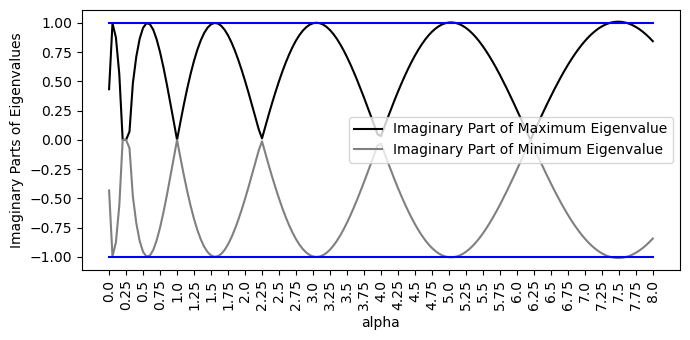

In [14]:
plt.plot(np.array(im_max), label="Imaginary Part of Maximum Eigenvalue", color = "black", marker = "")
plt.plot(np.array(im_min), label="Imaginary Part of Minimum Eigenvalue", color = "gray", marker = "")
plt.plot([1 for i in range(161)], color = "blue")
plt.plot([-1 for i in range(161)], color = "blue")
plt.xticks([i for i in range(0,161,5)], [i / 20 for i in range(0,161,5)], rotation='vertical')
plt.xlabel('alpha')
plt.ylabel('Imaginary Parts of Eigenvalues')
plt.ylim([min(im_min)-0.1,max(im_max)+0.1])
plt.legend()
plt.show()